# 2.  Data

In [1]:
# Download the library and dependencies that we will need to run this lab.

import pandas as pd
import numpy as np
import seaborn as sns

###  2.1.  Data Source

In [2]:
# Download the data from the open data site of UK server and read it into a pandas dataframe.

df = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv')
print("Data read into dataframe!")

Data read into dataframe!


C:\Users\alriv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Show the first few rows.

df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [4]:
# Get the dimensions of the dataframe.

df.shape 

(122635, 32)

Our dataset consists of 122635 files. Each row represents an accident, and for each one is documented 32 specific features involved in it. We know that our main metric will be Accident_Severity, so checked their information in our data frame:

In [5]:
# frequency table

dfAccSev = pd.DataFrame(df.groupby(['Accident_Severity'])['Accident_Index'].count())
dfAccSev.head()

,Accident_Index
Accident_Severity,
1,1671
2,23165
3,97799


As expected, we have far fewer accidents category 1, which are the fatalities. Category 2 are the severe accidents, and category 3 are slight injuries. 

In [6]:
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

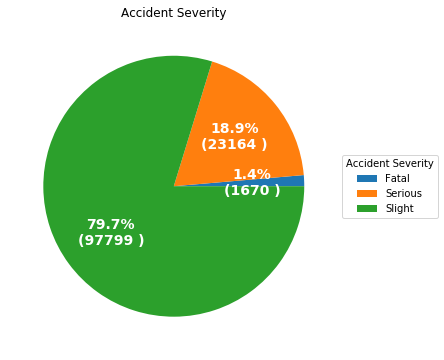

In [7]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

Severity = ["1671 Fatal",
          "23165 Serious",
          "97799 Slight"]

data = [float(x.split()[0]) for x in Severity]
Types = [x.split()[-1] for x in Severity]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="W"))

ax.legend(wedges, Types,
          title="Accident Severity",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Accident Severity")

plt.show()

 The next step is check missing values

###  2.2.  Data Cleaning

In [8]:
# Check values encoded as -1 

Codneg = df.isin([-1]).sum(axis=0)
Codneg = Codneg.reset_index()
Codneg.columns = ['Feature','Count of -1 Codification']
Codneg = Codneg[Codneg['Count of -1 Codification']>0].sort_values(by="Count of -1 Codification", ascending=False)
Codneg

,Feature,Count of -1 Codification
19,Junction_Control,54842
20,2nd_Road_Class,52211
22,Pedestrian_Crossing-Human_Control,3173
23,Pedestrian_Crossing-Physical_Facilities,2850
27,Special_Conditions_at_Site,1524
28,Carriageway_Hazards,1325
26,Road_Surface_Conditions,1223
18,Junction_Detail,772
21,2nd_Road_Number,204
25,Weather_Conditions,19


In order to deal with -1 coding is necessary to replace it in some features or drop the entire filed if its not useful for the model

In [9]:
df2 = df.copy()

In [10]:
# replace "-1" to "0" (Not at junction or within 20 metres) in Junction_Control
df2["Junction_Control"].replace(-1, 0, inplace=True)

# drop copy column "2nd_Road_Class" from "df2"
df2.drop("2nd_Road_Class", axis = 1, inplace=True)

# replace "-1" to "0" (None within 50 metres) in Pedestrian_Crossing-Human_Control
df2["Pedestrian_Crossing-Human_Control"].replace(-1, 0, inplace=True)

# replace "-1" to "0" (No physical crossing facilities within 50 metres) in Pedestrian_Crossing-Physical_Facilities
df2["Pedestrian_Crossing-Physical_Facilities"].replace(-1, 0, inplace=True)

# replace "-1" to "0" (None) in "Special_Conditions_at_Site"
df2["Special_Conditions_at_Site"].replace(-1, 0, inplace=True)

# replace "-1" to "0" (None) in "Carriageway_Hazards"
df2["Carriageway_Hazards"].replace(-1, 0, inplace=True)

# replace "-1" to "1" (Dry) in "Road_Surface_Conditions"
df2["Road_Surface_Conditions"].replace(-1, 1, inplace=True)

# replace "-1" to "0" (Not at junction or within 20 metres) in Junction_Control
df2["Junction_Detail"].replace(-1, 0, inplace=True)

# drop copy column "2nd_Road_Number" from "df2"
df2.drop("2nd_Road_Number", axis = 1, inplace=True)

# replace "-1" to "9" (Unknown) in Weather_Conditions
df2["Weather_Conditions"].replace(-1, 9, inplace=True)

# drop copy column "Did_Police_Officer_Attend_Scene_of_Accident" from "df2"
df2.drop("Did_Police_Officer_Attend_Scene_of_Accident", axis = 1, inplace=True)

# replace "-1" to "3" (Unallocated) in Urban_or_Rural_Area
df2["Urban_or_Rural_Area"].replace(-1, 3, inplace=True)

In [11]:
# Second check values encoded as -1 

Codneg2 = df2.isin([-1]).sum(axis=0)
Codneg2 = Codneg2.reset_index()
Codneg2.columns = ['Feature','Count of -1 Codification']
Codneg2 = Codneg2[Codneg2['Count of -1 Codification']>0].sort_values(by="Count of -1 Codification", ascending=False)
Codneg2

,Feature,Count of -1 Codification


Once the effect is minimized, we proceed to review the entire dataset to know how many data is missing

In [12]:
missing = df.isnull().sum().to_frame()
missing = missing.reset_index()
missing.columns = ['Feature','Count of missing values']
missing = missing[missing['Count of missing values']>0].sort_values(by="Count of missing values", ascending=False)
missing

,Feature,Count of missing values
31,LSOA_of_Accident_Location,6445
1,Location_Easting_OSGR,55
2,Location_Northing_OSGR,55
3,Longitude,55
4,Latitude,55
11,Time,13


LSOA_of_Accident_Location, Location_Easting_OSGR , Location_Northing_OSGR, Longitude and Latitude will be droppped because all of them are not of interest in this analysis, so the fields will be removed and data missing in column "Time" will be replace by 00:00

In [13]:
# LSOA_of_Accident_Location will be dropped, as it has not valuable information.
df2.drop('LSOA_of_Accident_Location', axis=1, inplace=True)

# Location_Easting_OSGR will be dropped, as it has not valuable information.
df2.drop('Location_Easting_OSGR', axis=1, inplace=True)

# Location_Northing_OSGR will be dropped, as it has not valuable information.
df2.drop('Location_Northing_OSGR', axis=1, inplace=True)

# Longitude will be dropped, as it has not valuable information.
df2.drop('Longitude', axis=1, inplace=True)

# Latitude will be dropped, as it has not valuable information.
df2.drop('Latitude', axis=1, inplace=True)

# Time missing values will be filling with '00:00'
df2['Time'].fillna('00:00',inplace=True)

# Date will be dropped, as it has not valuable information.
df2.drop('Date', axis=1, inplace=True)

# Local_Authority_(Highway) will be dropped, as it has not valuable information.
df2.drop('Local_Authority_(Highway)', axis=1, inplace=True)

In [14]:
# Second check missing data
missing2 = df2.isnull().sum().to_frame()
missing2 = missing2.reset_index()
missing2.columns = ['Feature','Count of missing values']
missing2

,Feature,Count of missing values
0,Accident_Index,0
1,Police_Force,0
2,Accident_Severity,0
3,Number_of_Vehicles,0
4,Number_of_Casualties,0
5,Day_of_Week,0
6,Time,0
7,Local_Authority_(District),0
8,1st_Road_Class,0
9,1st_Road_Number,0


The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other)

In [15]:
df2.dtypes

Accident_Index                             object
Police_Force                                int64
Accident_Severity                           int64
Number_of_Vehicles                          int64
Number_of_Casualties                        int64
Day_of_Week                                 int64
Time                                       object
Local_Authority_(District)                  int64
1st_Road_Class                              int64
1st_Road_Number                             int64
Road_Type                                   int64
Speed_limit                                 int64
Junction_Detail                             int64
Junction_Control                            int64
Pedestrian_Crossing-Human_Control           int64
Pedestrian_Crossing-Physical_Facilities     int64
Light_Conditions                            int64
Weather_Conditions                          int64
Road_Surface_Conditions                     int64
Special_Conditions_at_Site                  int64


### 2.3.  Data Balance

To make the selection of variables it is necessary to normalize some information and balance the dataset. In this case, the severity levels will be normalized.  This will be done by isolating each level of severity with typical normalizations where the values of the new variable oscillate between 0 and 1.

In [68]:
df2['Fatal'] = np.where(df2['Accident_Severity'] == 1 , 1, 0)
df2['Serious'] = np.where(df2['Accident_Severity'] == 2 , 1, 0)
df2['Slight'] = np.where(df2['Accident_Severity'] == 3 , 1, 0)
df2.head()

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Fatal,Serious,Slight
0,2018010080971,1,3,2,2,2,01:30,2,3,501,...,0,4,1,1,0,0,1,0,0,1
1,2018010080973,1,3,1,1,2,00:50,17,4,165,...,0,4,1,1,0,0,1,0,0,1
2,2018010080974,1,3,2,1,2,00:45,3,3,1,...,5,4,1,1,0,0,1,0,0,1
3,2018010080981,1,2,2,1,2,03:00,17,4,167,...,5,4,2,2,0,0,1,0,1,0
4,2018010080982,1,2,2,2,2,02:20,6,3,207,...,0,4,1,2,0,0,1,0,1,0


To balance the dataset it is necessary to point out a normalized variable, in this case the severity level "Fatal" will be taken where:

-  1 =  means Fatal accident ( Yes )
-  0 =  means No Fatal accident ( No )

There are lots of options at this stage. Its possible to resampling the dataset by oversampling the fatalities, or under sampling the severe and slight accidents. We could train simpler models using an area under the ROC curve metric, or we could use tree-based models like gradient boost or random forest. So, I decide to go to undersamplig

First it´s necessary to plot the frequency of the accident severity to visualise the imbalance:

In [69]:
target = "Fatal"

Separate input features (X) and target variable (y)

0    120964
1      1671
Name: Fatal, dtype: int64


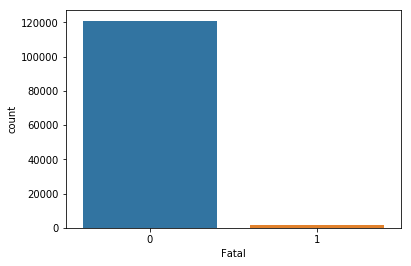

In [70]:
ax = sns.countplot(x=target, data=df2)
print(df2[target].value_counts())

In [71]:
100* (1671/float(df2.shape[0]))

1.3625800138622741

In [72]:
100* (120964/float(df.shape[0]))

98.63741998613773

In [73]:
minority_class_len = len(df2[df2[target] == 1])
print(minority_class_len)

1671


In [74]:
majority_class_indices = df2[df2[target] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            122625, 122626, 122627, 122628, 122629, 122630, 122631, 122632,
            122633, 122634],
           dtype='int64', length=120964)


In [75]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

1671


In [76]:
minority_class_indices = df2[df2[target] == 1].index
print(minority_class_indices)

Int64Index([   129,    142,    201,    705,    977,   1091,   1253,   1461,
              1573,   2299,
            ...
            122232, 122236, 122250, 122335, 122381, 122401, 122467, 122542,
            122615, 122618],
           dtype='int64', length=1671)


In [77]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [78]:
under_sample = df2.loc[under_sample_indices]

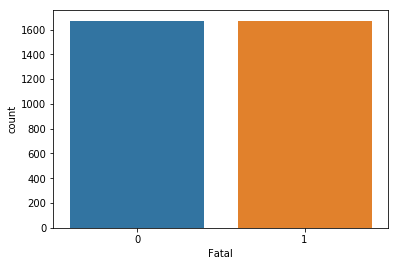

In [79]:
sns.countplot(x=target, data=under_sample)

In [80]:
under_sample.head()

,Accident_Index,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Fatal,Serious,Slight
129,2018010081565,1,1,1,1,5,13:40,17,3,124,...,0,1,4,1,0,0,1,1,0,0
142,2018010081607,1,1,2,4,5,19:55,24,3,3004,...,0,4,1,1,0,0,1,1,0,0
201,2018010081811,1,1,2,2,7,00:52,28,5,0,...,0,4,1,2,0,0,1,1,0,0
705,2018010083549,1,1,1,1,1,22:09,28,3,406,...,0,4,1,1,0,0,1,1,0,0
977,2018010084455,1,1,1,1,5,17:54,12,3,4,...,4,4,1,1,0,0,1,1,0,0


### 2.4. Feature Selection

The next step is select a series of factors that are likely to be predictive, eliminating some of the descriptive variables such as Police_Force, Local_Authority (District), 1st_Road_Number and the objective ields of each level of severity.

In [81]:
df3 = under_sample.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264209BC828>,
      dtype=object)

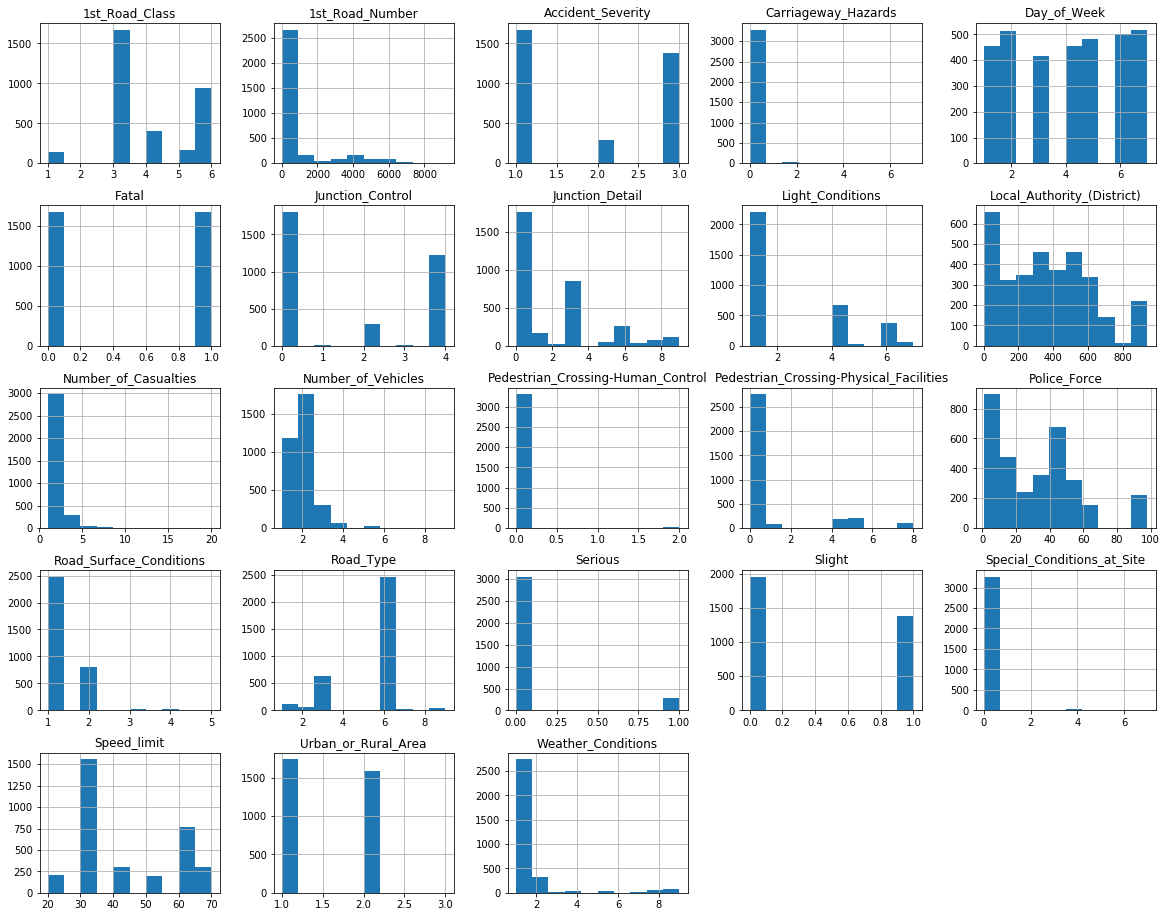

In [82]:
df3.hist(figsize=(20,16))

In [83]:
# Drop non predictive variables

df3.drop('Accident_Index', axis=1, inplace=True) 
#df3.drop('Accident_Severity', axis=1, inplace=True) 
df3.drop('Police_Force', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)
df3.drop('Local_Authority_(District)', axis=1, inplace=True)
df3.drop('1st_Road_Number', axis=1, inplace=True)
df3.drop('Fatal', axis=1, inplace=True) 
df3.drop('Serious', axis=1, inplace=True) 
df3.drop('Slight', axis=1, inplace=True)


df3.drop('Carriageway_Hazards', axis=1, inplace=True)
df3.drop('Special_Conditions_at_Site', axis=1, inplace=True)
df3.drop('Pedestrian_Crossing-Human_Control', axis=1, inplace=True)

In [84]:
df3.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
129,1,1,1,5,3,6,30,0,0,0,1,4,1,1
142,1,2,4,5,3,6,30,0,0,0,4,1,1,1
201,1,2,2,7,5,6,30,3,4,0,4,1,2,1
705,1,1,1,1,3,3,50,0,0,0,4,1,1,1
977,1,1,1,5,3,3,30,9,2,4,4,1,1,1


Since we are interested in a causal relationship, it makes sense to go even deeper individually into the other variables and remove the last ones from the dataset

In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 129 to 34024
Data columns (total 14 columns):
Accident_Severity                          3342 non-null int64
Number_of_Vehicles                         3342 non-null int64
Number_of_Casualties                       3342 non-null int64
Day_of_Week                                3342 non-null int64
1st_Road_Class                             3342 non-null int64
Road_Type                                  3342 non-null int64
Speed_limit                                3342 non-null int64
Junction_Detail                            3342 non-null int64
Junction_Control                           3342 non-null int64
Pedestrian_Crossing-Physical_Facilities    3342 non-null int64
Light_Conditions                           3342 non-null int64
Weather_Conditions                         3342 non-null int64
Road_Surface_Conditions                    3342 non-null int64
Urban_or_Rural_Area                        3342 non-null int64
dtypes: 

In [86]:
df3.shape

(3342, 14)

# 3. Exploratory Data Analysis ( EDA )

### 3.1. Methodology

Since we are interested in a causal relationship, it makes sense to go even deeper individually into the other variables and remove the last ones from the dataset.
After cleaning the data, we finally have 3342 rows and 14 characteristics correlated with Fatal Accident for modeling, from which it is possible to extract important information to understand the behavior of the target variable.

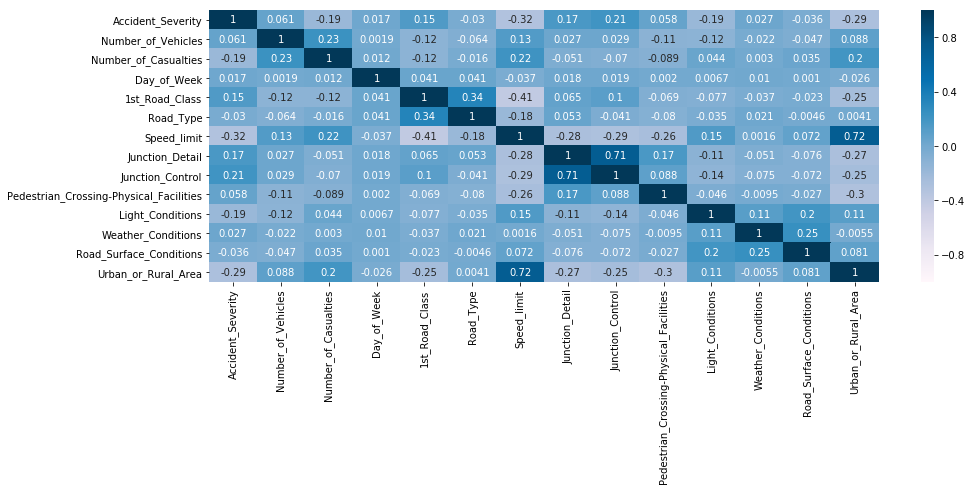

In [87]:
cor=df3.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor,vmin=-1,vmax=1,cbar=True,cmap='PuBu',annot=True)
plt.show()

    Now we would like to know the significant of the correlation estimate. 

In [88]:
from scipy import stats

Let's calculate the Pearson Correlation Coefficient and P-value between Accident Severity and Number of Vehicles


We choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

### Relationship between Accident Severity and Number of Vehicles

In [89]:
pearson_coef, p_value = stats.pearsonr(df3['Number_of_Vehicles'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.06059240752642189  with a P-value of P = 0.00045702053904048953


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.05, we say there is moderate evidence that the correlation is significant between Number of Vehicles and Accident Severity although the linear relationship is isn't extremely strong (~0.050) and the two variables most likely do not affect each other.</p>

### Relationship between Accident Severity and Number of Casualties

In [90]:
pearson_coef, p_value = stats.pearsonr(df3['Number_of_Casualties'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.1906115047887619  with a P-value of P = 1.034580334190749e-28


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between Number of Casualties and Accident Severity although the linear relationship is negative and isn't extremely strong (~0.16)</p>

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

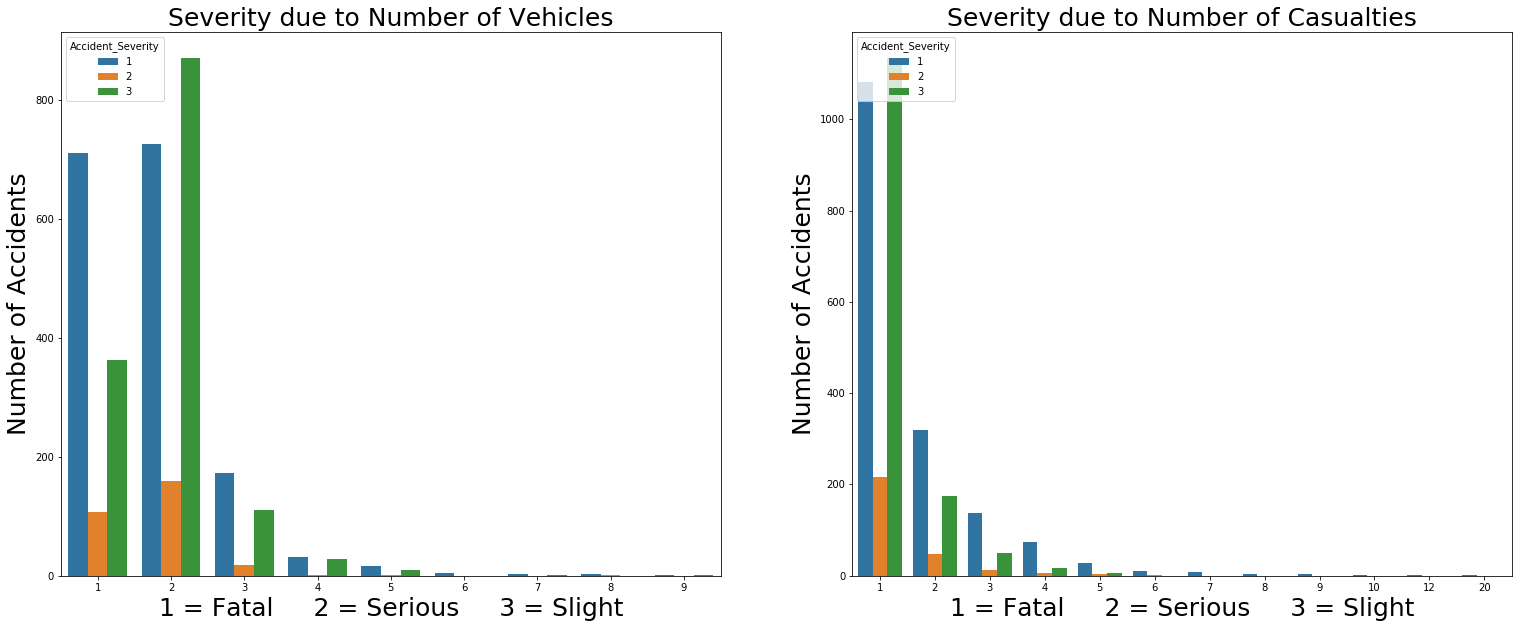

In [91]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Number_of_Vehicles", hue="Accident_Severity", data=df3)

plt.title("Severity due to Number of Vehicles", fontsize=25)
plt.ylabel("Number of Accidents", fontsize=25)
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight", fontsize=25)

plt.subplot(1,2,2)
sns.countplot(x="Number_of_Casualties", hue="Accident_Severity", data=df3)
plt.title("Severity due to Number of Casualties", fontsize=25)
plt.ylabel("Number of Accidents", fontsize=25)
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight", fontsize=25)

### Relationship between Accident Severity and Day of Week

In [92]:
pearson_coef, p_value = stats.pearsonr(df3['Day_of_Week'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.01691413797699819  with a P-value of P = 0.3283162255362566


<h5>Conclusion:</h5>
<p>Since the p-value is >> 0.1, we say there is no evidence that the correlation is significant between Day of Week and Accident Severity, the linear relationship is negative and isn't extremely strong (~0.02) so the two variables most likely do not affect each other.</p>

### Relationship between Accident Severity and 1st Road Class

In [93]:
pearson_coef, p_value = stats.pearsonr(df3['1st_Road_Class'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.14753065352248554  with a P-value of P = 1.0125523078590599e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between 1st Road Class and Accident Severity although the linear relationship isn't extremely strong (~0.14)</p>

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

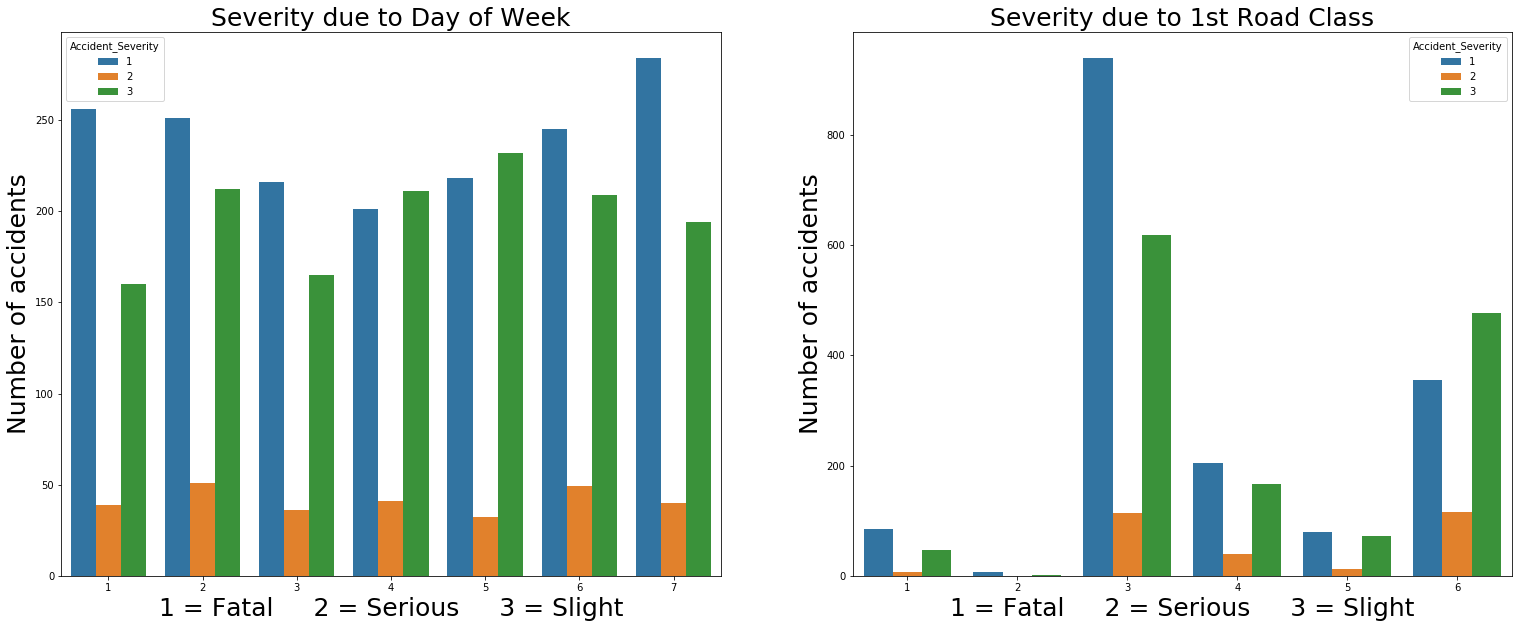

In [94]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Day_of_Week", hue="Accident_Severity", data=df3)
plt.title("Severity due to Day of Week", fontsize=25)
plt.ylabel("Number of accidents", fontsize=25)
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight", fontsize=25)

plt.subplot(1,2,2)
sns.countplot(x="1st_Road_Class", hue="Accident_Severity", data=df3)
plt.title("Severity due to 1st Road Class", fontsize=25)
plt.ylabel("Number of accidents", fontsize=25)
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight", fontsize=25)

### Relationship between Accident Severity and Road Type

In [95]:
pearson_coef, p_value = stats.pearsonr(df3['Road_Type'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.03041557181569852  with a P-value of P = 0.07873488856844436


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.05, we say there is moderate evidence that the correlation is significant between Road Type and Accident Severity although the linear relationship is isn't extremely strong (~0.040) and the two variables most likely do not affect each other.</p>

### Relationship between Accident Severity and Speed limit

In [96]:
pearson_coef, p_value = stats.pearsonr(df3['Speed_limit'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.3156317584450551  with a P-value of P = 3.373608134934491e-78


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between Speed Limit and Accident Severity although the linear relationship isn't strong (~0.3)

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

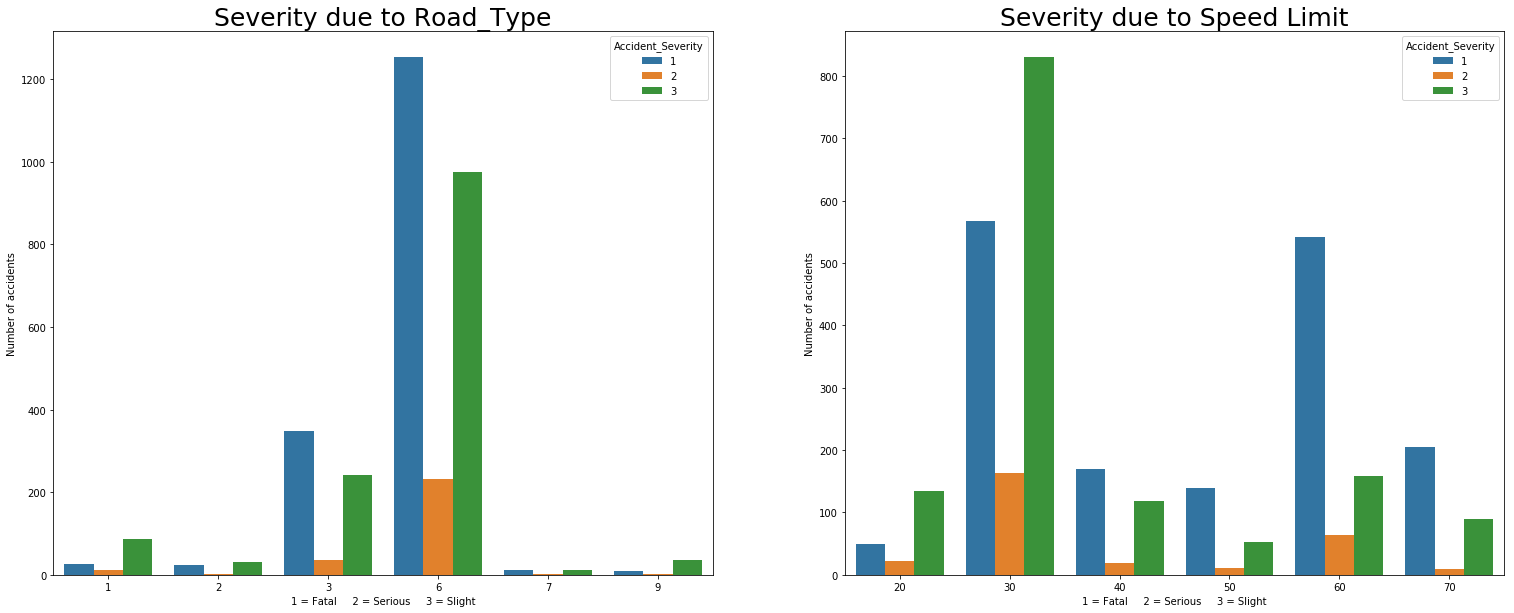

In [97]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Road_Type", hue="Accident_Severity", data=df3)
plt.title("Severity due to Road_Type", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

plt.subplot(1,2,2)
sns.countplot(x="Speed_limit", hue="Accident_Severity", data=df3)
plt.title("Severity due to Speed Limit", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

### Relationship between Accident Severity and Junction Detail  

In [98]:
pearson_coef, p_value = stats.pearsonr(df3['Junction_Detail'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.17093366552745917  with a P-value of P = 2.4889612842271754e-23


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between Junction Detail and Accident Severity although the linear relationship isn't strong (~0.1)

### Relationship between Accident Severity and Junction Control

In [99]:
pearson_coef, p_value = stats.pearsonr(df3['Junction_Control'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.20721430867198648  with a P-value of P = 9.791769308008341e-34


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between Junction Detail and Accident Severity although the linear relationship isn't strong (~0.1)

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

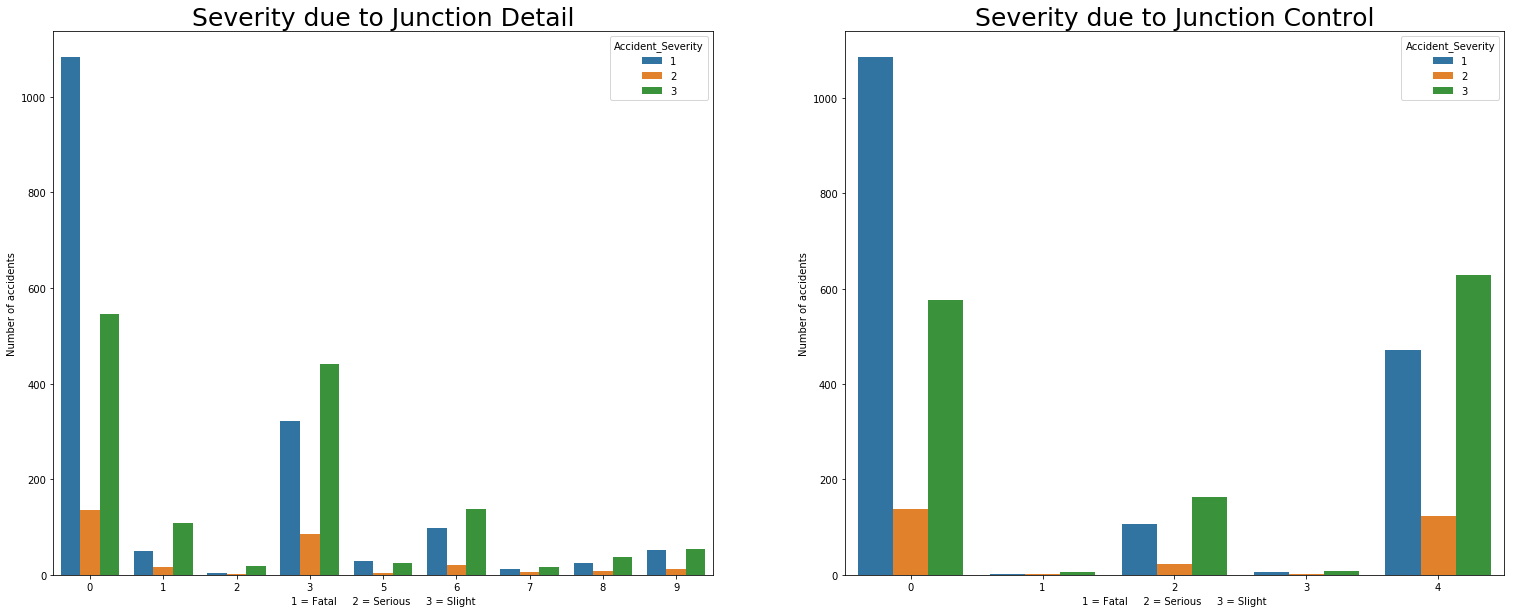

In [100]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Junction_Detail", hue="Accident_Severity", data=df3)
plt.title("Severity due to Junction Detail", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

plt.subplot(1,2,2)
sns.countplot(x="Junction_Control", hue="Accident_Severity", data=df3)
plt.title("Severity due to Junction Control", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

### Relationship between Accident Severity and Pedestrian Crossing Physical Facilities 

In [101]:
pearson_coef, p_value = stats.pearsonr(df3['Pedestrian_Crossing-Physical_Facilities'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05765337736151322  with a P-value of P = 0.000854619666842652


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.05, we say there is moderate evidence that the correlation is significant between Pedestrian Crossing Physical Facilities and Accident Severity although the linear relationship isn't strong (~0.056 and the two variables most likely do not affect each other.

### Relationship between Accident Severity and Light Conditions 

In [102]:
pearson_coef, p_value = stats.pearsonr(df3['Light_Conditions'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.18677063816731337  with a P-value of P = 1.2987945617211769e-27


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between Junction Detail and Accident Severity although the linear relationship isn't strong (~0.1)

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

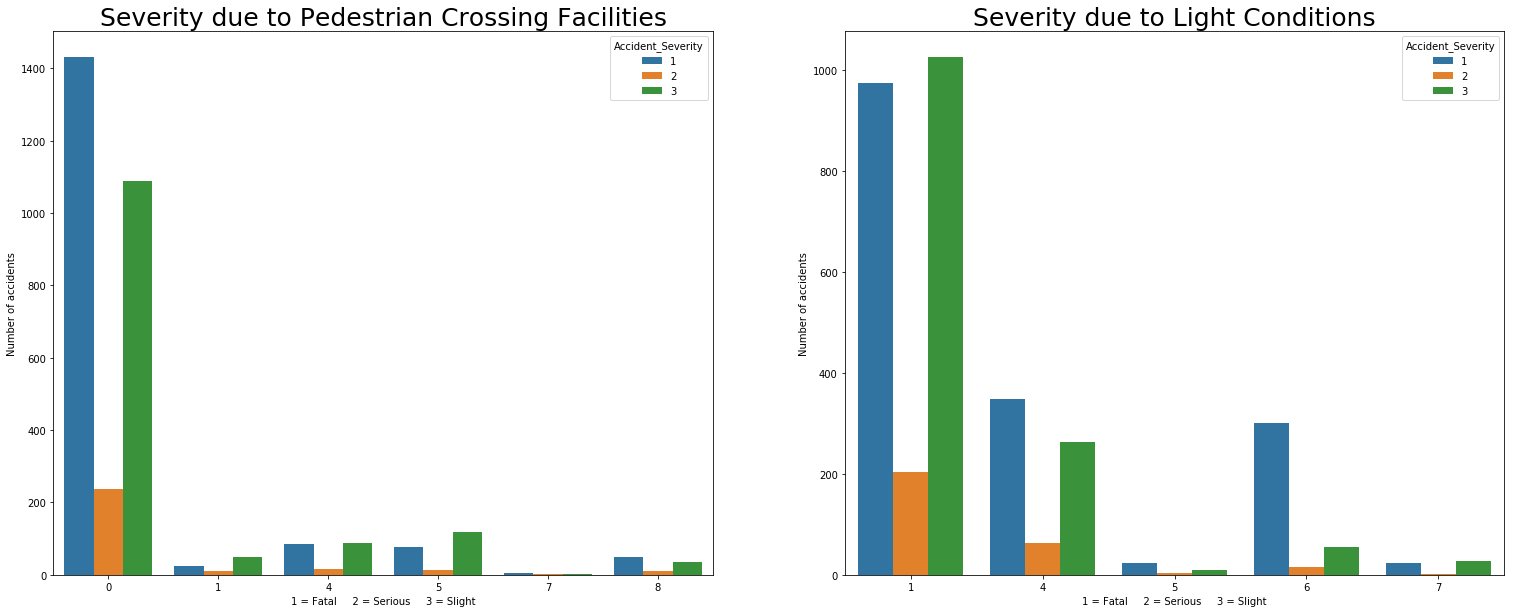

In [103]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Pedestrian_Crossing-Physical_Facilities", hue="Accident_Severity", data=df3)
plt.title("Severity due to Pedestrian Crossing Facilities", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

plt.subplot(1,2,2)
sns.countplot(x="Light_Conditions", hue="Accident_Severity", data=df3)
plt.title("Severity due to Light Conditions", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

### Relationship between Accident Severity and Weather Conditions  

In [104]:
pearson_coef, p_value = stats.pearsonr(df3['Weather_Conditions'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.027343611657327186  with a P-value of P = 0.11400630734477574


<h5>Conclusion:</h5>
<p>Since the p-value is $>$ 0.1, we say there is no evidence that the correlation is significant between Weather Conditions and Accident Severity. The linear relationship isn't extremely strong (~0.02) and the two variables most likely do not affect each other.</p>

### Relationship between Accident Severity and Road Surface Conditions 

In [105]:
pearson_coef, p_value = stats.pearsonr(df3['Road_Surface_Conditions'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.03600933871695566  with a P-value of P = 0.03737925927929609


<h5>Conclusion:</h5>
<p>Since the p-value is $>$ 0.1, we say there is no evidence that the correlation is significant between Road Surface Conditions and Accident Severity. The linear relationship isn't extremely strong (~0.004) and the two variables most likely do not affect each other.</p>

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

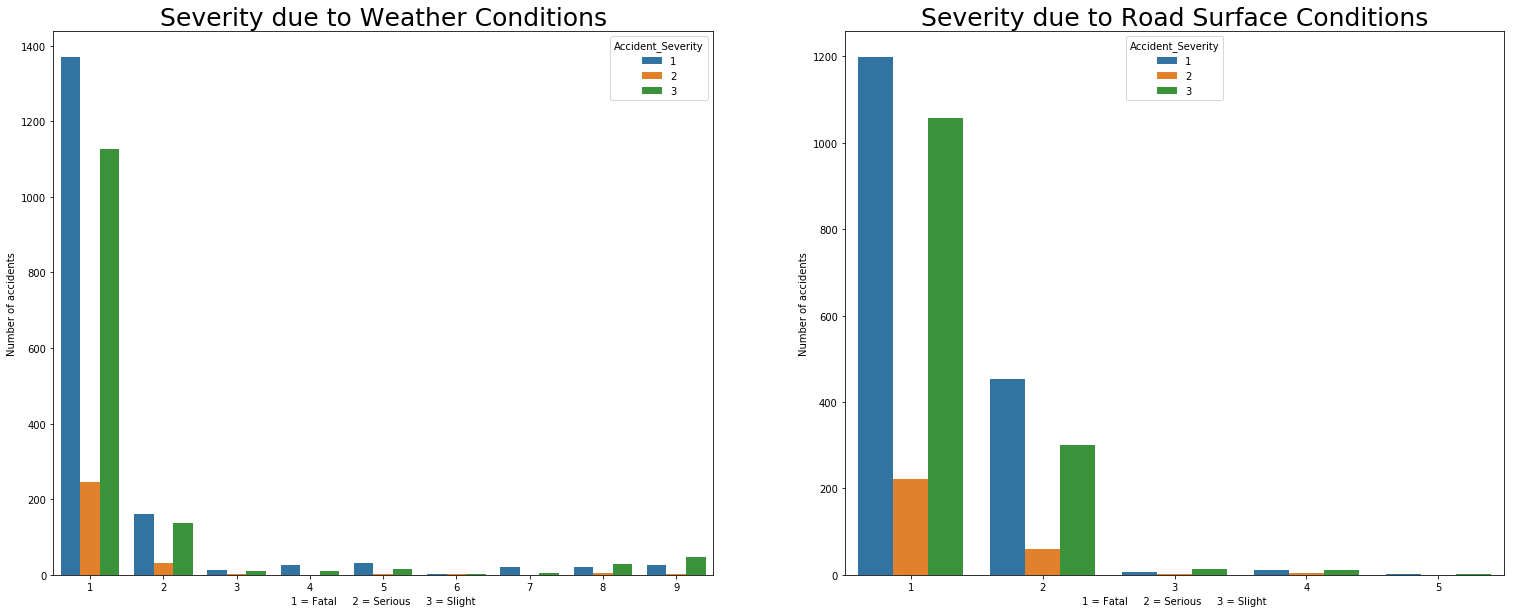

In [106]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Weather_Conditions", hue="Accident_Severity", data=df3)
plt.title("Severity due to Weather Conditions", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

plt.subplot(1,2,2)
sns.countplot(x="Road_Surface_Conditions", hue="Accident_Severity", data=df3)
plt.title("Severity due to Road Surface Conditions", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")

### Relationship between Accident Severity and Urban or Rural Area 

In [107]:
pearson_coef, p_value = stats.pearsonr(df3['Urban_or_Rural_Area'], df3['Accident_Severity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.28816571676327646  with a P-value of P = 6.375773736910143e-65


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, we say there is strong evidence that the correlation is significant between Urban or Rural Area and Accident Severity although the linear relationship isn't strong (~0.3)

Text(0.5, 0, '1 = Fatal     2 = Serious     3 = Slight')

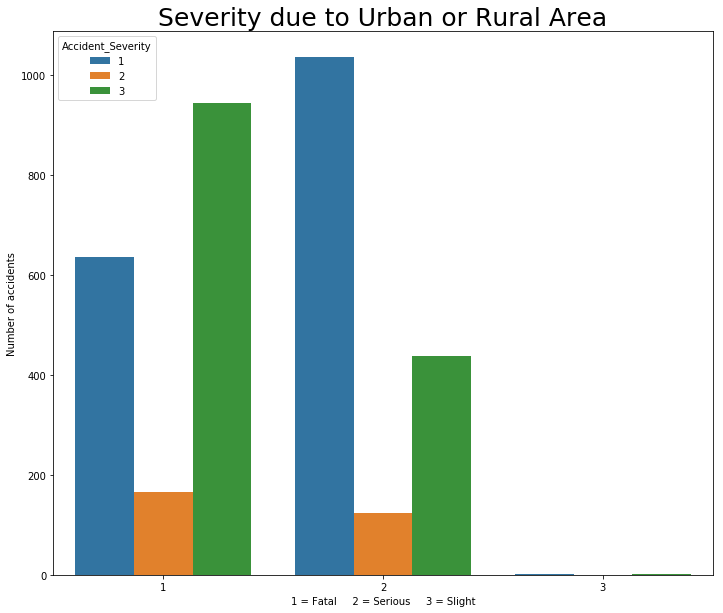

In [108]:
plt.figure(figsize=(26,10))

plt.subplot(1,2,1)
sns.countplot(x="Urban_or_Rural_Area", hue="Accident_Severity", data=df3)
plt.title("Severity due to Urban or Rural Area", fontsize=25)
plt.ylabel("Number of accidents")
plt.xlabel("1 = Fatal     2 = Serious     3 = Slight")



In [109]:
# Drop variables with Non Relationship with Accident Severity

df3.drop('Day_of_Week', axis=1, inplace=True) 
df3.drop('Weather_Conditions', axis=1, inplace=True) 
df3.drop('Road_Surface_Conditions', axis=1, inplace=True)

# Drop variables with Moderate Relationship with Accident Severity

df3.drop('Number_of_Vehicles', axis=1, inplace=True) 
df3.drop('Road_Type', axis=1, inplace=True) 
df3.drop('Pedestrian_Crossing-Physical_Facilities', axis=1, inplace=True)



In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 129 to 34024
Data columns (total 8 columns):
Accident_Severity       3342 non-null int64
Number_of_Casualties    3342 non-null int64
1st_Road_Class          3342 non-null int64
Speed_limit             3342 non-null int64
Junction_Detail         3342 non-null int64
Junction_Control        3342 non-null int64
Light_Conditions        3342 non-null int64
Urban_or_Rural_Area     3342 non-null int64
dtypes: int64(8)
memory usage: 395.0 KB


In [111]:
df4 = df3.copy()

In [112]:
df4.columns

Index(['Accident_Severity', 'Number_of_Casualties', '1st_Road_Class',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Light_Conditions', 'Urban_or_Rural_Area'],
      dtype='object')

In [113]:
# Replace  in "Accident_Severity"

df4["Accident_Severity"].replace(1, "Fatal", inplace=True)
df4["Accident_Severity"].replace(2, "Serious", inplace=True)
df4["Accident_Severity"].replace(3, "Slight", inplace=True)

# Replace  in "1st_Road_Class"
df4["1st_Road_Class"].replace(1, "Motorway", inplace=True)
df4["1st_Road_Class"].replace(2, "A(M)", inplace=True)
df4["1st_Road_Class"].replace(3, "A", inplace=True)
df4["1st_Road_Class"].replace(4, "B", inplace=True)
df4["1st_Road_Class"].replace(5, "C", inplace=True)
df4["1st_Road_Class"].replace(6, "Unclassified", inplace=True)

# Replace  in "Road_Type"
#df4["Road_Type"].replace(1, "Roundabout", inplace=True)
#df4["Road_Type"].replace(2, "One way street", inplace=True)
#df4["Road_Type"].replace(3, "Dual carriageway", inplace=True)
#df4["Road_Type"].replace(6, "Single carriageway", inplace=True)
#df4["Road_Type"].replace(7, "Slip road", inplace=True)
#df4["Road_Type"].replace(9, "Unknown", inplace=True)
#df4["Road_Type"].replace(12, "One way street/Slip road", inplace=True)


# Replace  in "Junction_Detail"
df4["Junction_Detail"].replace(0, "Not at junction or within 20 metres", inplace=True)
df4["Junction_Detail"].replace(1, "Roundabout", inplace=True)
df4["Junction_Detail"].replace(2, "Mini-roundabout", inplace=True)
df4["Junction_Detail"].replace(3, "T or staggered junction", inplace=True)
df4["Junction_Detail"].replace(5, "Slip road", inplace=True)
df4["Junction_Detail"].replace(6, "Crossroads", inplace=True)
df4["Junction_Detail"].replace(7, "More than 4 arms (not roundabout)", inplace=True)
df4["Junction_Detail"].replace(8, "Private drive or entrance", inplace=True)
df4["Junction_Detail"].replace(9, "Other junction", inplace=True)

# Replace  in "Junction_Control"
df4["Junction_Control"].replace(0, "Not at junction or within 20 metres", inplace=True)
df4["Junction_Control"].replace(1, "Authorised person", inplace=True)
df4["Junction_Control"].replace(2, "Auto traffic signal", inplace=True)
df4["Junction_Control"].replace(3, "Stop sign", inplace=True)
df4["Junction_Control"].replace(4, "Give way or uncontrolled", inplace=True)

# Replace  in "Pedestrian_Crossing-Physical_Facilities"
#df4["Pedestrian_Crossing-Physical_Facilities"].replace(0, "No physical crossing facilities within 50 metres", inplace=True)
#df4["Pedestrian_Crossing-Physical_Facilities"].replace(1, "Zebra", inplace=True)
#df4["Pedestrian_Crossing-Physical_Facilities"].replace(4, "Pelican, puffin, toucan or similar non-junction pedestrian light crossing", inplace=True)
#df4["Pedestrian_Crossing-Physical_Facilities"].replace(5, "Pedestrian phase at traffic signal junction", inplace=True)
#df4["Pedestrian_Crossing-Physical_Facilities"].replace(7, "Footbridge or subway", inplace=True)
#df4["Pedestrian_Crossing-Physical_Facilities"].replace(8, "Central refuge", inplace=True)

# Replace  in "Light_Conditions"
df4["Light_Conditions"].replace(1, "Daylight", inplace=True)
df4["Light_Conditions"].replace(4, "Darkness - lights lit", inplace=True)
df4["Light_Conditions"].replace(5, "Darkness - lights unlit", inplace=True)
df4["Light_Conditions"].replace(6, "Darkness - no lighting", inplace=True)
df4["Light_Conditions"].replace(7, "Darkness - lighting unknown", inplace=True)

# Replace  in "Urban_or_Rural_Area"
df4["Urban_or_Rural_Area"].replace(1, "Urban", inplace=True)
df4["Urban_or_Rural_Area"].replace(2, "Rural", inplace=True)
df4["Urban_or_Rural_Area"].replace(3, "Unallocated", inplace=True)




In [114]:
df4.head(100)

,Accident_Severity,Number_of_Casualties,1st_Road_Class,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Urban_or_Rural_Area
129,Fatal,1,A,30,Not at junction or within 20 metres,Not at junction or within 20 metres,Daylight,Urban
142,Fatal,4,A,30,Not at junction or within 20 metres,Not at junction or within 20 metres,Darkness - lights lit,Urban
201,Fatal,2,C,30,T or staggered junction,Give way or uncontrolled,Darkness - lights lit,Urban
705,Fatal,1,A,50,Not at junction or within 20 metres,Not at junction or within 20 metres,Darkness - lights lit,Urban
977,Fatal,1,A,30,Other junction,Auto traffic signal,Darkness - lights lit,Urban
1091,Fatal,1,A,30,Other junction,Give way or uncontrolled,Daylight,Urban
1253,Fatal,1,B,30,Not at junction or within 20 metres,Not at junction or within 20 metres,Darkness - lights lit,Urban
1461,Fatal,1,A,20,Not at junction or within 20 metres,Not at junction or within 20 metres,Daylight,Urban
1573,Fatal,4,C,40,Roundabout,Give way or uncontrolled,Darkness - lights lit,Urban
2299,Fatal,1,Unclassified,30,T or staggered junction,Give way or uncontrolled,Daylight,Urban


In [115]:
dummy_variable_1 = pd.get_dummies(df4["Accident_Severity"])
dummy_variable_2 = pd.get_dummies(df4["1st_Road_Class"])
#dummy_variable_3 = pd.get_dummies(df4["Road_Type"])
dummy_variable_4 = pd.get_dummies(df4["Junction_Detail"])
dummy_variable_5 = pd.get_dummies(df4["Junction_Control"])
#dummy_variable_6 = pd.get_dummies(df4["Pedestrian_Crossing-Physical_Facilities"])
dummy_variable_7 = pd.get_dummies(df4["Light_Conditions"])
dummy_variable_8 = pd.get_dummies(df4["Urban_or_Rural_Area"])


In [116]:
dummy_variable_1.rename(columns={'Fatal':'Accident_Severity: Fatal', 
                                 'Serious':'Accident_Severity: Serious',
                                 'Slight':'Accident_Severity: Slight',
                                }, inplace=True)

dummy_variable_2.rename(columns={'Motorway':'1st_Road_Class: Motorway', 
                                 'A(M)':'1st_Road_Class: A(M)',
                                 'A':'1st_Road_Class: A',
                                 'B':'1st_Road_Class: B',
                                 'C':'1st_Road_Class: C',
                                 'Unclassified':'1st_Road_Class: Unclassified',
                                }, inplace=True)

#dummy_variable_3.rename(columns={'Roundabout':'Road_Type: Roundabout', 
#                                 'One way street':'Road_Type: One way street',
#                                 'Dual carriageway':'Road_Type: Dual carriageway',
#                                 'Single carriageway':'Road_Type: Single carriageway',
#                                 'Slip road':'Road_Type: Slip road',
#                                 'Unknown':'Road_Type: Unknown',
#                                 'One way street/Slip road':'Road_Type: One way street/Slip road',
#                                 }, inplace=True)

dummy_variable_4.rename(columns={'Not at junction or within 20 metres':'Junction_Detail: Not at junction or within 20 metres', 
                                 'Roundabout':'Junction_Detail: Roundabout',
                                 'Mini-roundabout':'Junction_Detail: Mini-roundabout',
                                 'T or staggered junction':'Junction_Detail: T or staggered junction',
                                 'Slip road':'Junction_Detail: Slip road',
                                 'Crossroads':'Junction_Detail: Crossroads',
                                 'More than 4 arms (not roundabout)':'Junction_Detail: More than 4 arms (not roundabout)',
                                 'Private drive or entrance':'Junction_Detail: Private drive or entrance',
                                 'Other junction':'Junction_Detail: Other junction',
                                 }, inplace=True)

dummy_variable_5.rename(columns={'Not at junction or within 20 metres':'Junction_Control: Not at junction or within 20 metres', 
                                 'Authorised person':'Junction_Control: Authorised person',
                                 'Auto traffic signal':'Junction_Control: Auto traffic signal',
                                 'Stop sign':'Junction_Control: Stop sign',
                                 'Give way or uncontrolled':'Junction_Control: Give way or uncontrolled',
                                 }, inplace=True)

#dummy_variable_6.rename(columns={'No physical crossing facilities within 50 metres':'Pedestrian_Crossing-Physical_Facilities: No physical crossing facilities within 50 metres', 
#                                 'Zebra':'Pedestrian_Crossing-Physical_Facilities: Zebra',
#                                 'Pelican, puffin, toucan or similar non-junction pedestrian light crossing':'Pedestrian_Crossing-Physical_Facilities: Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
#                                 'Pedestrian phase at traffic signal junction':'Pedestrian_Crossing-Physical_Facilities: Pedestrian phase at traffic signal junction',
#                                 'Footbridge or subway':'Pedestrian_Crossing-Physical_Facilities: Footbridge or subway',
#                                 'Central refuge':'Pedestrian_Crossing-Physical_Facilities: Central refuge',
#                                 }, inplace=True)

dummy_variable_7.rename(columns={'Daylight':'Light_Conditions: Daylight', 
                                 'Darkness - lights lit':'Light_Conditions: Darkness - lights lit',
                                 'Darkness - lights unlit':'Light_Conditions: Darkness - lights unlit',
                                 'Darkness - no lighting':'Light_Conditions: Darkness - no lighting',
                                 'Darkness - lighting unknown':'Light_Conditions: Darkness - lighting unknown',
                                 }, inplace=True)

dummy_variable_8.rename(columns={'Urban':'Urban_or_Rural_Area: Urban', 
                                 'Rural':'Urban_or_Rural_Area: Rural',
                                 'Unallocated':'Urban_or_Rural_Area: Unallocated',
                                 }, inplace=True)









In [118]:
# merge data frame "df" and "dummy_variable_1" 
df4 = pd.concat([df4, dummy_variable_1, dummy_variable_2, dummy_variable_4, dummy_variable_5, dummy_variable_7, dummy_variable_8,], axis=1)

# drop original column "fuel-type" from "df"
df4.drop("Accident_Severity", axis = 1, inplace=True)
df4.drop("1st_Road_Class", axis = 1, inplace=True)
#df4.drop("Road_Type", axis = 1, inplace=True)
df4.drop("Junction_Detail", axis = 1, inplace=True)
df4.drop("Junction_Control", axis = 1, inplace=True)
#df4.drop("Pedestrian_Crossing-Physical_Facilities", axis = 1, inplace=True)
df4.drop("Light_Conditions", axis = 1, inplace=True)
df4.drop("Urban_or_Rural_Area", axis = 1, inplace=True)

df4.head()

,Number_of_Casualties,Speed_limit,Accident_Severity: Fatal,Accident_Severity: Serious,Accident_Severity: Slight,1st_Road_Class: A,1st_Road_Class: A(M),1st_Road_Class: B,1st_Road_Class: C,1st_Road_Class: Motorway,...,Junction_Control: Not at junction or within 20 metres,Junction_Control: Stop sign,Light_Conditions: Darkness - lighting unknown,Light_Conditions: Darkness - lights lit,Light_Conditions: Darkness - lights unlit,Light_Conditions: Darkness - no lighting,Light_Conditions: Daylight,Urban_or_Rural_Area: Rural,Urban_or_Rural_Area: Unallocated,Urban_or_Rural_Area: Urban
129,1,30,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
142,4,30,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
201,2,30,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
705,1,50,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
977,1,30,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# 4. Modeling

In [119]:
df4.corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,Number_of_Casualties,Speed_limit,Accident_Severity: Fatal,Accident_Severity: Serious,Accident_Severity: Slight,1st_Road_Class: A,1st_Road_Class: A(M),1st_Road_Class: B,1st_Road_Class: C,1st_Road_Class: Motorway,1st_Road_Class: Unclassified,Junction_Detail: Crossroads,Junction_Detail: Mini-roundabout,Junction_Detail: More than 4 arms (not roundabout),Junction_Detail: Not at junction or within 20 metres,Junction_Detail: Other junction,Junction_Detail: Private drive or entrance,Junction_Detail: Roundabout,Junction_Detail: Slip road,Junction_Detail: T or staggered junction,Junction_Control: Authorised person,Junction_Control: Auto traffic signal,Junction_Control: Give way or uncontrolled,Junction_Control: Not at junction or within 20 metres,Junction_Control: Stop sign,Light_Conditions: Darkness - lighting unknown,Light_Conditions: Darkness - lights lit,Light_Conditions: Darkness - lights unlit,Light_Conditions: Darkness - no lighting,Light_Conditions: Daylight,Urban_or_Rural_Area: Rural,Urban_or_Rural_Area: Unallocated,Urban_or_Rural_Area: Urban
Number_of_Casualties,1.000,0.215,0.189,-0.025,-0.177,0.062,-0.002,0.001,-0.001,0.084,-0.107,0.006,-0.015,-0.035,0.087,0.005,-0.022,-0.038,-0.001,-0.068,-0.015,-0.044,-0.056,0.079,0.012,-0.004,-0.046,0.008,0.089,-0.020,0.199,-0.011,-0.199
Speed_limit,0.215,1.000,0.319,-0.067,-0.286,0.158,0.082,-0.012,-0.047,0.350,-0.308,-0.131,-0.063,-0.081,0.350,-0.071,-0.044,-0.057,0.121,-0.253,-0.048,-0.200,-0.223,0.336,-0.014,-0.010,-0.243,0.018,0.364,-0.037,0.719,-0.003,-0.719
Accident_Severity: Fatal,0.189,0.319,1.000,-0.307,-0.840,0.124,0.029,0.000,-0.008,0.046,-0.157,-0.069,-0.057,-0.030,0.241,-0.026,-0.040,-0.101,0.002,-0.142,-0.033,-0.085,-0.174,0.223,-0.022,-0.014,0.015,0.035,0.218,-0.161,0.284,-0.000,-0.284
Accident_Severity: Serious,-0.025,-0.067,-0.307,1.000,-0.258,-0.066,-0.016,0.012,-0.006,-0.027,0.081,-0.005,-0.001,0.022,-0.034,0.011,0.008,0.005,-0.015,0.032,0.009,-0.009,0.041,-0.035,-0.005,-0.022,0.015,-0.001,-0.055,0.030,-0.031,-0.008,0.031
Accident_Severity: Slight,-0.177,-0.286,-0.840,-0.258,1.000,-0.088,-0.020,-0.007,0.012,-0.032,0.113,0.072,0.058,0.018,-0.225,0.020,0.036,0.100,0.006,0.126,0.028,0.091,0.154,-0.206,0.025,0.027,-0.024,-0.035,-0.190,0.147,-0.271,0.004,0.270
1st_Road_Class: A,0.062,0.158,0.124,-0.066,-0.088,1.000,-0.052,-0.374,-0.229,-0.208,-0.629,0.024,-0.057,0.036,-0.018,0.003,-0.023,0.080,0.031,-0.034,-0.033,0.137,-0.061,-0.019,0.022,-0.005,0.021,-0.029,0.024,-0.026,0.107,0.000,-0.107
1st_Road_Class: A(M),-0.002,0.082,0.029,-0.016,-0.020,-0.052,1.000,-0.019,-0.012,-0.011,-0.033,-0.015,-0.004,-0.005,0.026,-0.010,-0.008,0.014,0.039,-0.030,-0.002,-0.016,-0.016,0.025,-0.003,-0.007,-0.026,-0.005,0.073,-0.024,0.054,-0.001,-0.054
1st_Road_Class: B,0.001,-0.012,0.000,0.012,-0.007,-0.374,-0.019,1.000,-0.085,-0.078,-0.235,0.012,0.022,-0.020,0.003,-0.022,0.023,-0.026,-0.034,0.015,-0.017,-0.013,0.007,0.000,0.016,0.003,-0.025,-0.004,0.027,0.003,0.051,-0.009,-0.051
1st_Road_Class: C,-0.001,-0.047,-0.008,-0.006,0.012,-0.229,-0.012,-0.085,1.000,-0.048,-0.144,-0.009,0.029,-0.009,-0.021,-0.021,-0.033,-0.010,-0.030,0.060,-0.010,-0.018,0.018,-0.007,0.005,-0.018,0.001,-0.024,-0.015,0.019,-0.023,-0.006,0.023
1st_Road_Class: Motorway,0.084,0.350,0.046,-0.027,-0.032,-0.208,-0.011,-0.078,-0.048,1.000,-0.131,-0.060,-0.018,-0.021,0.134,-0.024,-0.030,-0.028,0.162,-0.121,-0.010,-0.059,-0.096,0.130,-0.014,0.009,-0.030,0.080,0.078,-0.046,0.155,-0.005,-0.155


### Now here we could choose between the three levels of accident severity in order to develop the model, so I rather to choose the one with the most impact on health in this case fatal accidents 

From the previous section  we know that good predictors of Fatal accidents will be :</p>
<ul>
    <li>Accident_Severity: Fatal</li>
    <li>Number_of_Casualties</li>
    <li>Speed_limit</li>
    <li>1st_Road_Class: A</li>
    <li>Junction_Detail: Not at junction or within 20 metres</li>
    <li>Junction_Detail: Slip road</li>
    <li>Junction_Control: Not at junction or within 20 metres</li>
    <li>Light_Conditions: Darkness - no lighting</li>
    <li>Urban_or_Rural_Area: Rural</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [127]:
z = df4[['Accident_Severity: Fatal',
            'Number_of_Casualties',
            'Speed_limit',
            '1st_Road_Class: A',
            'Junction_Detail: Not at junction or within 20 metres',
            'Junction_Detail: Slip road',
            'Junction_Control: Not at junction or within 20 metres',
            'Light_Conditions: Darkness - no lighting',
            'Urban_or_Rural_Area: Rural']]

In [137]:
z = z.astype('int64')

In [138]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 129 to 34024
Data columns (total 9 columns):
Accident_Severity: Fatal                                 3342 non-null int64
Number_of_Casualties                                     3342 non-null int64
Speed_limit                                              3342 non-null int64
1st_Road_Class: A                                        3342 non-null int64
Junction_Detail: Not at junction or within 20 metres     3342 non-null int64
Junction_Detail: Slip road                               3342 non-null int64
Junction_Control: Not at junction or within 20 metres    3342 non-null int64
Light_Conditions: Darkness - no lighting                 3342 non-null int64
Urban_or_Rural_Area: Rural                               3342 non-null int64
dtypes: int64(9)
memory usage: 261.1 KB


### Feature sets

In [139]:
X = np.asarray(z.drop(['Accident_Severity: Fatal'],axis=1))
y = np.asarray(z['Accident_Severity: Fatal'])

### Normalization

In [140]:
from sklearn import preprocessing

In [141]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\alriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\alriv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.45393948, -0.76435861,  1.        ,  0.94581067, -0.12935449,
         0.92500582, -0.35444538, -0.9560802 ],
       [ 2.38878207, -0.76435861,  1.        ,  0.94581067, -0.12935449,
         0.92500582, -0.35444538, -0.9560802 ],
       [ 0.49363437, -0.76435861, -1.        , -1.05729406, -0.12935449,
        -1.08107428, -0.35444538, -0.9560802 ],
       [-0.45393948,  0.50906436,  1.        ,  0.94581067, -0.12935449,
         0.92500582, -0.35444538, -0.9560802 ],
       [-0.45393948, -0.76435861,  1.        , -1.05729406, -0.12935449,
        -1.08107428, -0.35444538, -0.9560802 ]])

### Test-Train Split

In [142]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2673, 8) (2673,)
Test set: (669, 8) (669,)


### Logistic Rregresion

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_LR = lr.predict(X_test)

C:\Users\alriv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neighbors (KNN)

In [145]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)

### Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
dt.fit(X_train, y_train)
yhat_DT = dt.predict(X_test)

### Support Vector Machine (SVM)

In [147]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf")
clf.fit(X_train, y_train)
yhat_SVM = clf.predict(X_test)

C:\Users\alriv\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Results and Discussion

In [148]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1_LR = f1_score(y_test, yhat_LR)
f1_KNN = f1_score(y_test,yhat_KNN)
f1_DT = f1_score(y_test, yhat_DT)
f1_SVM = f1_score(y_test, yhat_SVM)


acc_LR = accuracy_score(y_test, yhat_LR)
acc_KNN = accuracy_score(y_test, yhat_KNN)
acc_DT = accuracy_score(y_test, yhat_DT)
acc_SVM = accuracy_score(y_test, yhat_SVM)


p_LR = precision_score(y_test, yhat_LR)
p_KNN = precision_score(y_test, yhat_KNN)
p_DT = precision_score(y_test, yhat_DT)
p_SVM = precision_score(y_test, yhat_SVM)


r_LR = recall_score(y_test, yhat_LR)
r_KNN = recall_score(y_test, yhat_KNN)
r_DT = recall_score(y_test, yhat_DT)
r_SVM = recall_score(y_test, yhat_SVM)

report = {
'Model': ['Logistic Regression','K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 
'Accuracy Score' : [acc_LR, acc_KNN, acc_DT, acc_SVM],
'F1 Score' : [f1_LR, f1_KNN, f1_DT, f1_SVM],
'Precision' : [p_LR, p_KNN, p_DT, p_SVM],
'Recall' : [r_LR, r_KNN, r_DT, r_SVM]
}

results = pd.DataFrame(report)
results

,Model,Accuracy Score,F1 Score,Precision,Recall
0,Logistic Regression,0.683109,0.660256,0.671010,0.649842
1,K-Nearest Neighbour,0.645740,0.609555,0.637931,0.583596
2,Decision Tree,0.650224,0.627389,0.633441,0.621451
3,Support Vector Machine,0.650224,0.644377,0.621701,0.668770
